# Data Collection

In [84]:
"""
    These are the three main libraries that should
    always be imported by default.
"""
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
"""
    Explaination of the data can be found here:
    https://www.kaggle.com/c/titanic/data
"""

#Load Data
df = pd.read_csv('Titanic.csv')

# View Results
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#Statistical Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# more info on the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


## Missing Data 

In [88]:
# Remove Empty Data
#df = df.dropna(axis=0)

### Age 

In [89]:
# Get the age data into a 1d array
x = df.iloc[:,5].values
x = x.reshape(-1, 1)

# Use the imputer to fill in the NaN with the mean age
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(x)
x = imputer.transform(x)
x = np.around(x, decimals=1)

# Replace the values in the dataframe with the imputed data
df['Age'] = x

# View Results
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
"""
    Re-Run the above code to describe the dataframe to see the changes
"""

'\n    Re-Run the above code to describe the dataframe to see the changes\n'

### Cabin 

In [91]:
# Add values for cabin
df['HasCabin'] = np.nan  # Create a new column and set values to NaN
df.loc[df.Cabin.notnull(), 'HasCabin'] = 1
df.loc[df.Cabin.isnull(), 'HasCabin'] = 0
df = df.drop(['Cabin'], axis=1)

# View Results
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


In [92]:
"""
    Re-Run the above code to describe the dataframe to see the changes
"""

'\n    Re-Run the above code to describe the dataframe to see the changes\n'

## Categorical Data 

### Sex 

In [93]:
# Create Dummy Variables
sex = pd.get_dummies(df.Sex, prefix='Sex_')
df = df.join(sex)
df = df.drop(['Sex'], axis=1)

# View Results
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Sex__female,Sex__male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1.0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0.0,0,1


### Embarked 

In [94]:
# Create Dummy Variables
embarked = pd.get_dummies(df.Embarked, prefix='Embarked_')
df = df.join(embarked)
df = df.drop(['Embarked'], axis=1)

# View Results
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,HasCabin,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,0,1,0,0,1


### Irrelevant Variables 

In [95]:
#Drop columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# View Results
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
0,0,3,22.0,1,0,7.2500,0.0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1.0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0.0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1.0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0.0,0,1,0,0,1


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Univariate Plots

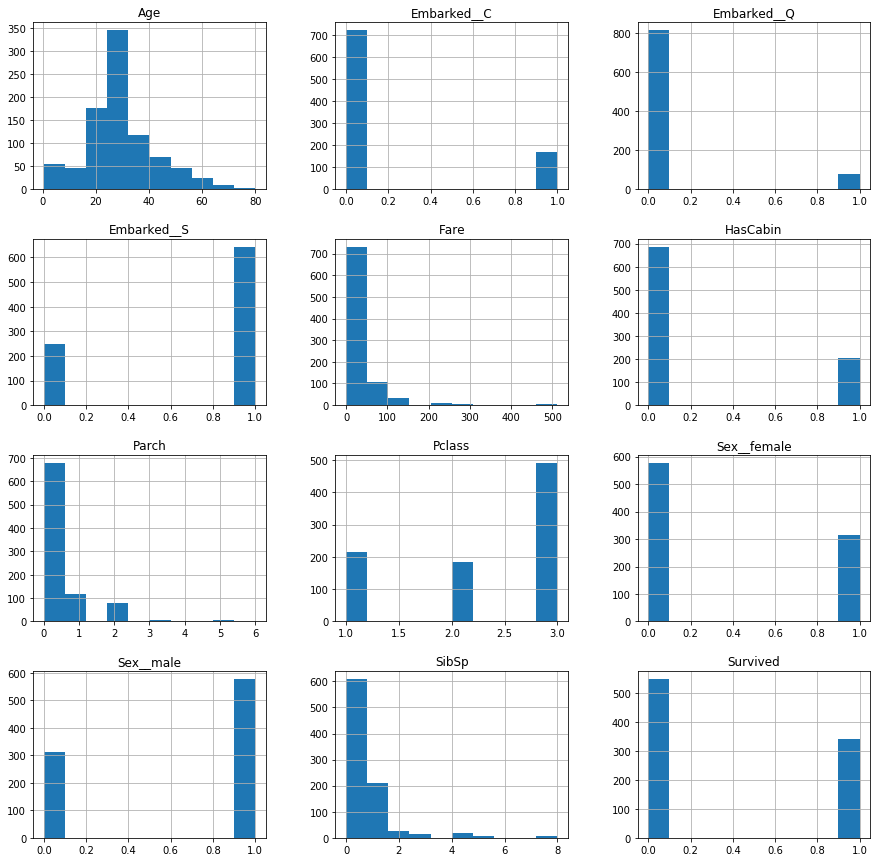

In [96]:
"""
    Use a histogram to understand the distribution 
    of the data.
"""

# Show histogram of each feature
df.hist(figsize=(15, 15))
plt.show()

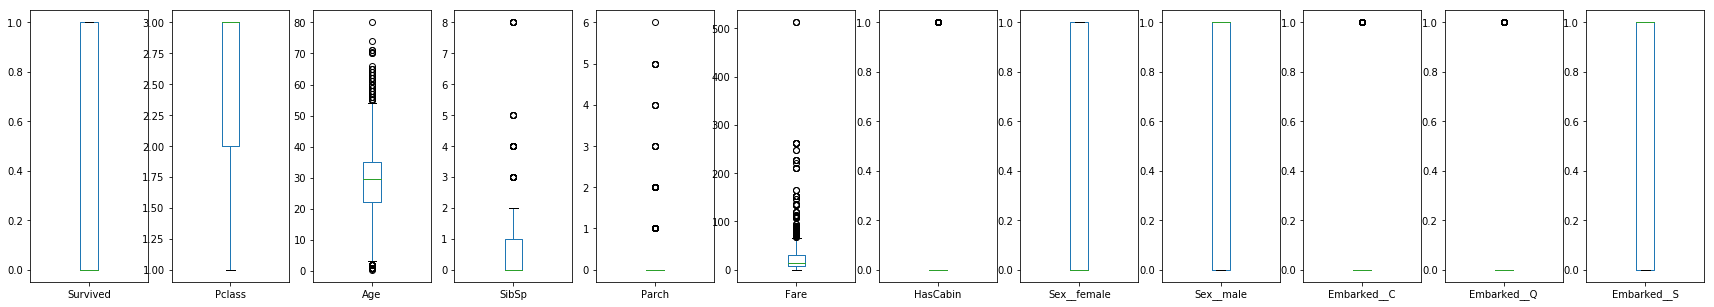

In [18]:
"""
    Use box plots to also understand the distribution 
    of the data.
"""

# box plots
df.plot(kind='box', subplots=True, figsize=(30, 5))
plt.show()

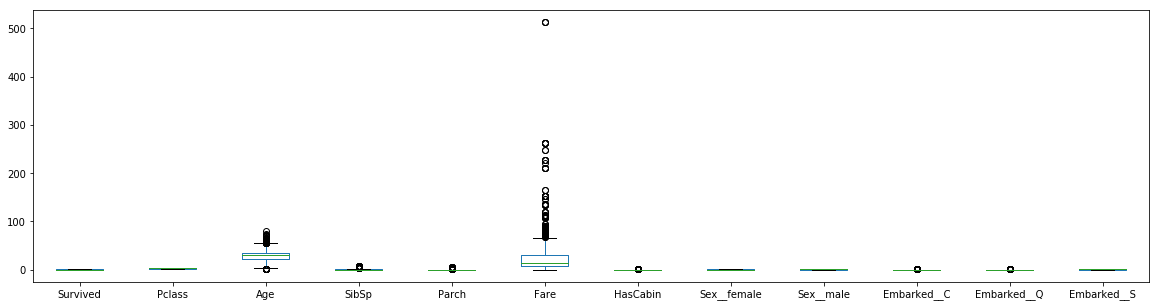

In [19]:
# box plots
df.plot(kind='box', figsize=(20, 5))
plt.show()

## Scatter Matrix

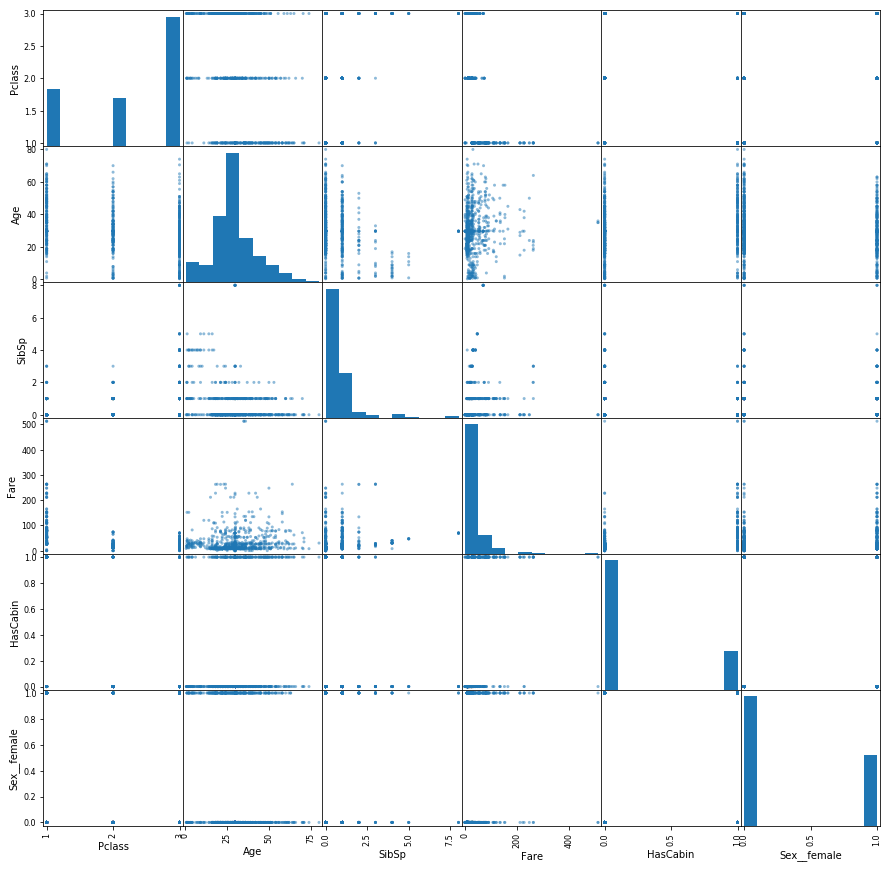

In [20]:
"""
    Use a correlation scatter matrix to understand the 
    relationship between all of the independant variables.
"""
#Display a scatter matrix
columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'HasCabin', 'Sex__female'] # dont include survived
pd.plotting.scatter_matrix(df[columns], figsize=(15, 15))
plt.show()

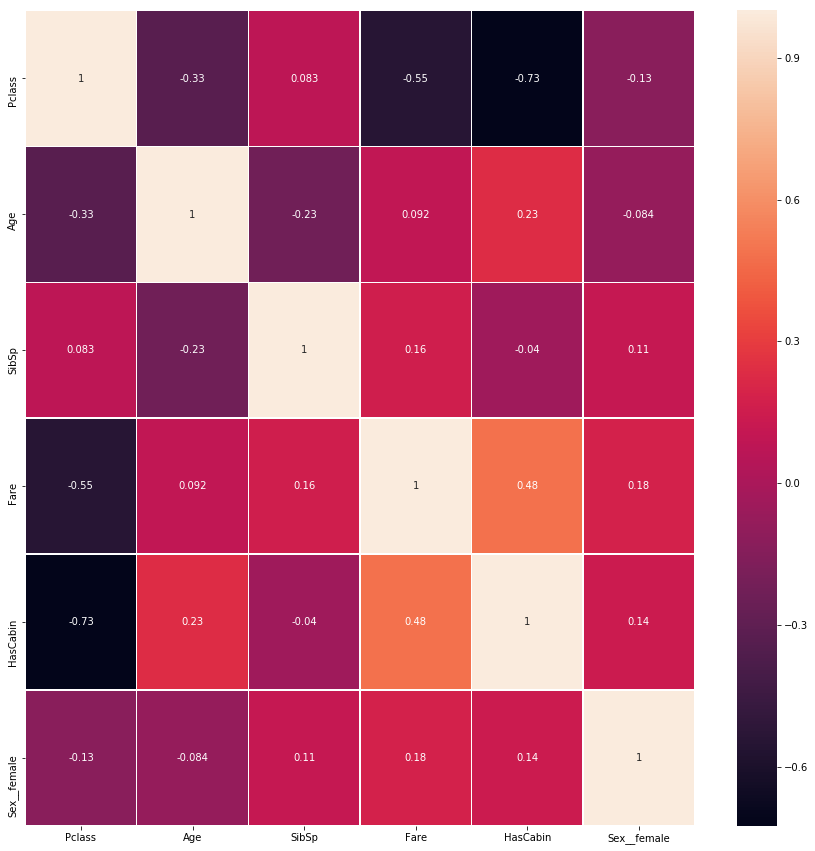

In [21]:
"""
    Heatmaps are used to easily understand the 
    linear relationship between the independant variables
"""

# Create Heatmap
import seaborn as sns
columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'HasCabin', 'Sex__female']
axsns = plt.subplots(figsize=(15, 15))
sns.heatmap(df[columns].corr(), annot=True, linewidths=.5)
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# PCA

In [22]:
# Library
from sklearn.decomposition import PCA

In [23]:
# Convert data to array
data = df.iloc[:,1:].values

# Perform PCA
pca = PCA(n_components=None) # Create an instance of the PCA class
"""
    We dont specify the amount of components to reduce to yet 
    as we want to see how many Princible Components explain the most varience in 
    the dataset
"""
pcaResults = pca.fit_transform(data) # Fit the data to the model
explained_variance = pca.explained_variance_ratio_ # Extract the varience

In [24]:
print(np.around(explained_variance,3) )

[0.935 0.063 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


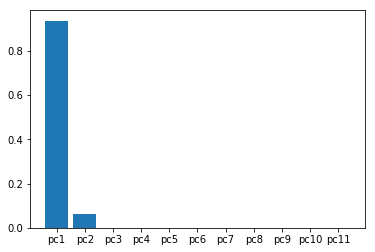

In [25]:
# Plot the explained varience
pcaComponents = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
y_pos = np.arange(len(pcaComponents))
plt.bar(y_pos, explained_variance)
plt.xticks(y_pos, pcaComponents)
plt.show()

### Perform the PCA 

In [26]:
# Convert data to array
data =  df.iloc[:,1:].values

# Perform PCA
pca = PCA(n_components=2) # Now specify 2 components
results = pca.fit_transform(data)

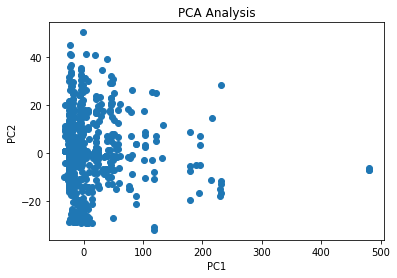

In [27]:
# Show Plot
plt.scatter(results[:,0], results[:,1])
plt.title('PCA Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
# Define Color map
color_map = {
 0: 'red',
 1: 'blue'}

In [29]:
# Create an array of colours based on the target column
colors = [color_map[c] for c in df['Survived']]

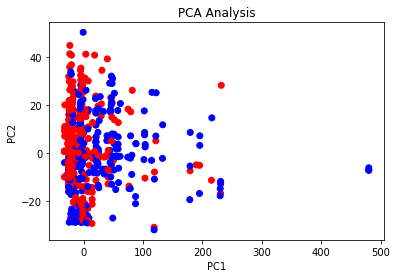

In [30]:
# Show Plot
plt.scatter(results[:,0], results[:,1], c=colors)
plt.title('PCA Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## K-means on PCA Data

In [31]:
# Import Kmeans Library
from sklearn.cluster import KMeans

# use the elbow method
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(results)
    wcss.append(kmeans.inertia_)

In [32]:
"""
    K-Means parameters 
    n_clusters = the number of clusters
    init = the method for placing initial centroids
    max_iter = the maximum amount of iterations
    n_init = the number of times that K-means is run with different random centroids
    random_state = the seed value
"""
# use the elbow method
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(results)
    wcss.append(kmeans.inertia_)

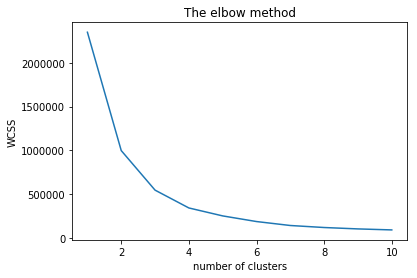

In [33]:
# Plot the WCSS results
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Apply K-means to petal data based on WCSS results
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, n_init=10, random_state=0)

# this will create an arry for the predicted clusters for the petal data
y_kmeans = kmeans.fit_predict(results)

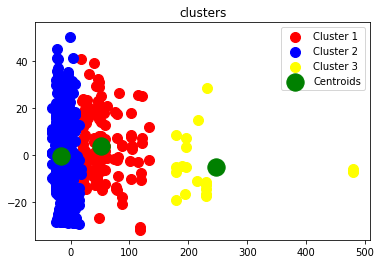

In [35]:
# Visualise the clusters
# Specify that we want the observation in X where the cluster == 0

"""
    X               = The dataset 
    [y_kmeans==0    = Where the cluster == 0 - uses the index of y-kmeans to selected rows from x
    , 0]            = The first column in the dataset
    s = 100         = The size of the points
    c = 'red'       = The color of the cluster
"""
plt.scatter(results[y_kmeans==0, 0], results[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(results[y_kmeans==1, 0], results[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(results[y_kmeans==2, 0], results[y_kmeans==2, 1], s=100, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='green', label='Centroids')
plt.title('clusters')
plt.legend()
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Multiple Logistic Regression

### using statsmodels

In [36]:
#Reference Variable
vars_to_drop = ['Sex__male','Embarked__C']
df = df.drop(vars_to_drop, axis=1)
df['_intercept'] = 1 # if all variables == 0
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,Sex__female,Embarked__Q,Embarked__S,_intercept
0,0,3,22.0,1,0,7.2500,0.0,0,0,1,1
1,1,1,38.0,1,0,71.2833,1.0,1,0,0,1
2,1,3,26.0,0,0,7.9250,0.0,1,0,1,1
3,1,1,35.0,1,0,53.1000,1.0,1,0,1,1
4,0,3,35.0,0,0,8.0500,0.0,0,0,1,1


In [37]:
# import the dataset
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [38]:
# split the dataset into the training set and test set
from sklearn.model_selection  import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=5)

In [113]:
# Another library for logistic regression 
# statsmodels diplays the results very nicely 
import statsmodels.api as sm

In [40]:
# Make the model
logit = sm.Logit(y_train, X_train)

# Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.438533
         Iterations 6


In [41]:
# View the results
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Fri, 15 Feb 2019   Pseudo R-squ.:                  0.3419
Time:                        18:55:12   Log-Likelihood:                -312.24
converged:                       True   LL-Null:                       -474.46
                                        LLR p-value:                 1.679e-64
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pclass         -1.0017      0.196     -5.109      0.000      -1.386      -0.617
Age            -0.0412      0.009     -4.662      0.000      -0.058      -0.024
SibSp          -0.3134      0.127     -2.461    

In [42]:
# Get the predicted values from the test set
y_pred = result.predict(X_test)

In [43]:
# print confusion matrix
from sklearn.metrics import *
print(confusion_matrix(y_test, np.round(y_pred,0)))

[[97 14]
 [20 48]]


In [44]:
# Accuracy %
from sklearn.metrics import *
accuracy_score(y_test, np.round(y_pred,0))

0.8100558659217877

In [138]:
result.predict([
    3    # Pclass
    ,90   # Age
    ,3   # SibSp - siblings / spouses 
    ,0   # Parch - parents / children 
    ,10   # Fare
    ,0   # HasCabin
    ,0   # Female
    ,0   # Embarked Q
    ,1   # Embarked S - C = Cherbourg, Q = Queenstown, S = Southampton
    ,1   # Intercept
])

array([0.00300537])

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Desision Trees

In [97]:
# import the dataset
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [98]:
# split the dataset into the training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=5)

In [99]:
# import the decision tree libraries
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [100]:
# Fit the model to the data
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [101]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [102]:
# View the results as a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[96, 15],
       [20, 48]])

In [103]:
# view the accuracy of the model
accuracy_score(y_test, y_pred)

0.8044692737430168

In [104]:
# View the importance of the features
feature_imp = pd.Series(classifier.feature_importances_,index=df.columns[1:]).sort_values(ascending=False)
feature_imp

Age            0.276961
Fare           0.240317
Sex__male      0.231445
Pclass         0.095054
SibSp          0.051231
HasCabin       0.035152
Parch          0.033482
Embarked__C    0.017241
Embarked__Q    0.010544
Embarked__S    0.008574
Sex__female    0.000000
dtype: float64

# Random forest

In [105]:
# import the dataset
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [106]:
# split the dataset into the training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=5)

In [107]:
# import the random tree libraries
from sklearn.ensemble import RandomForestClassifier
forestClassifier = RandomForestClassifier(n_estimators=100)

In [108]:
# fit the model to the data
forestClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
# Predicting the test set results
y_pred = forestClassifier.predict(X_test)

In [110]:
# View the results as a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[98, 13],
       [18, 50]])

In [111]:
# view the accuracy of the model
accuracy_score(y_test, y_pred)

0.8268156424581006

In [112]:
# View the importance of the features
feature_imp = pd.Series(classifier.feature_importances_,index=df.columns[1:]).sort_values(ascending=False)
feature_imp

Age            0.276961
Fare           0.240317
Sex__male      0.231445
Pclass         0.095054
SibSp          0.051231
HasCabin       0.035152
Parch          0.033482
Embarked__C    0.017241
Embarked__Q    0.010544
Embarked__S    0.008574
Sex__female    0.000000
dtype: float64

In [80]:
from sklearn import tree
import graphviz

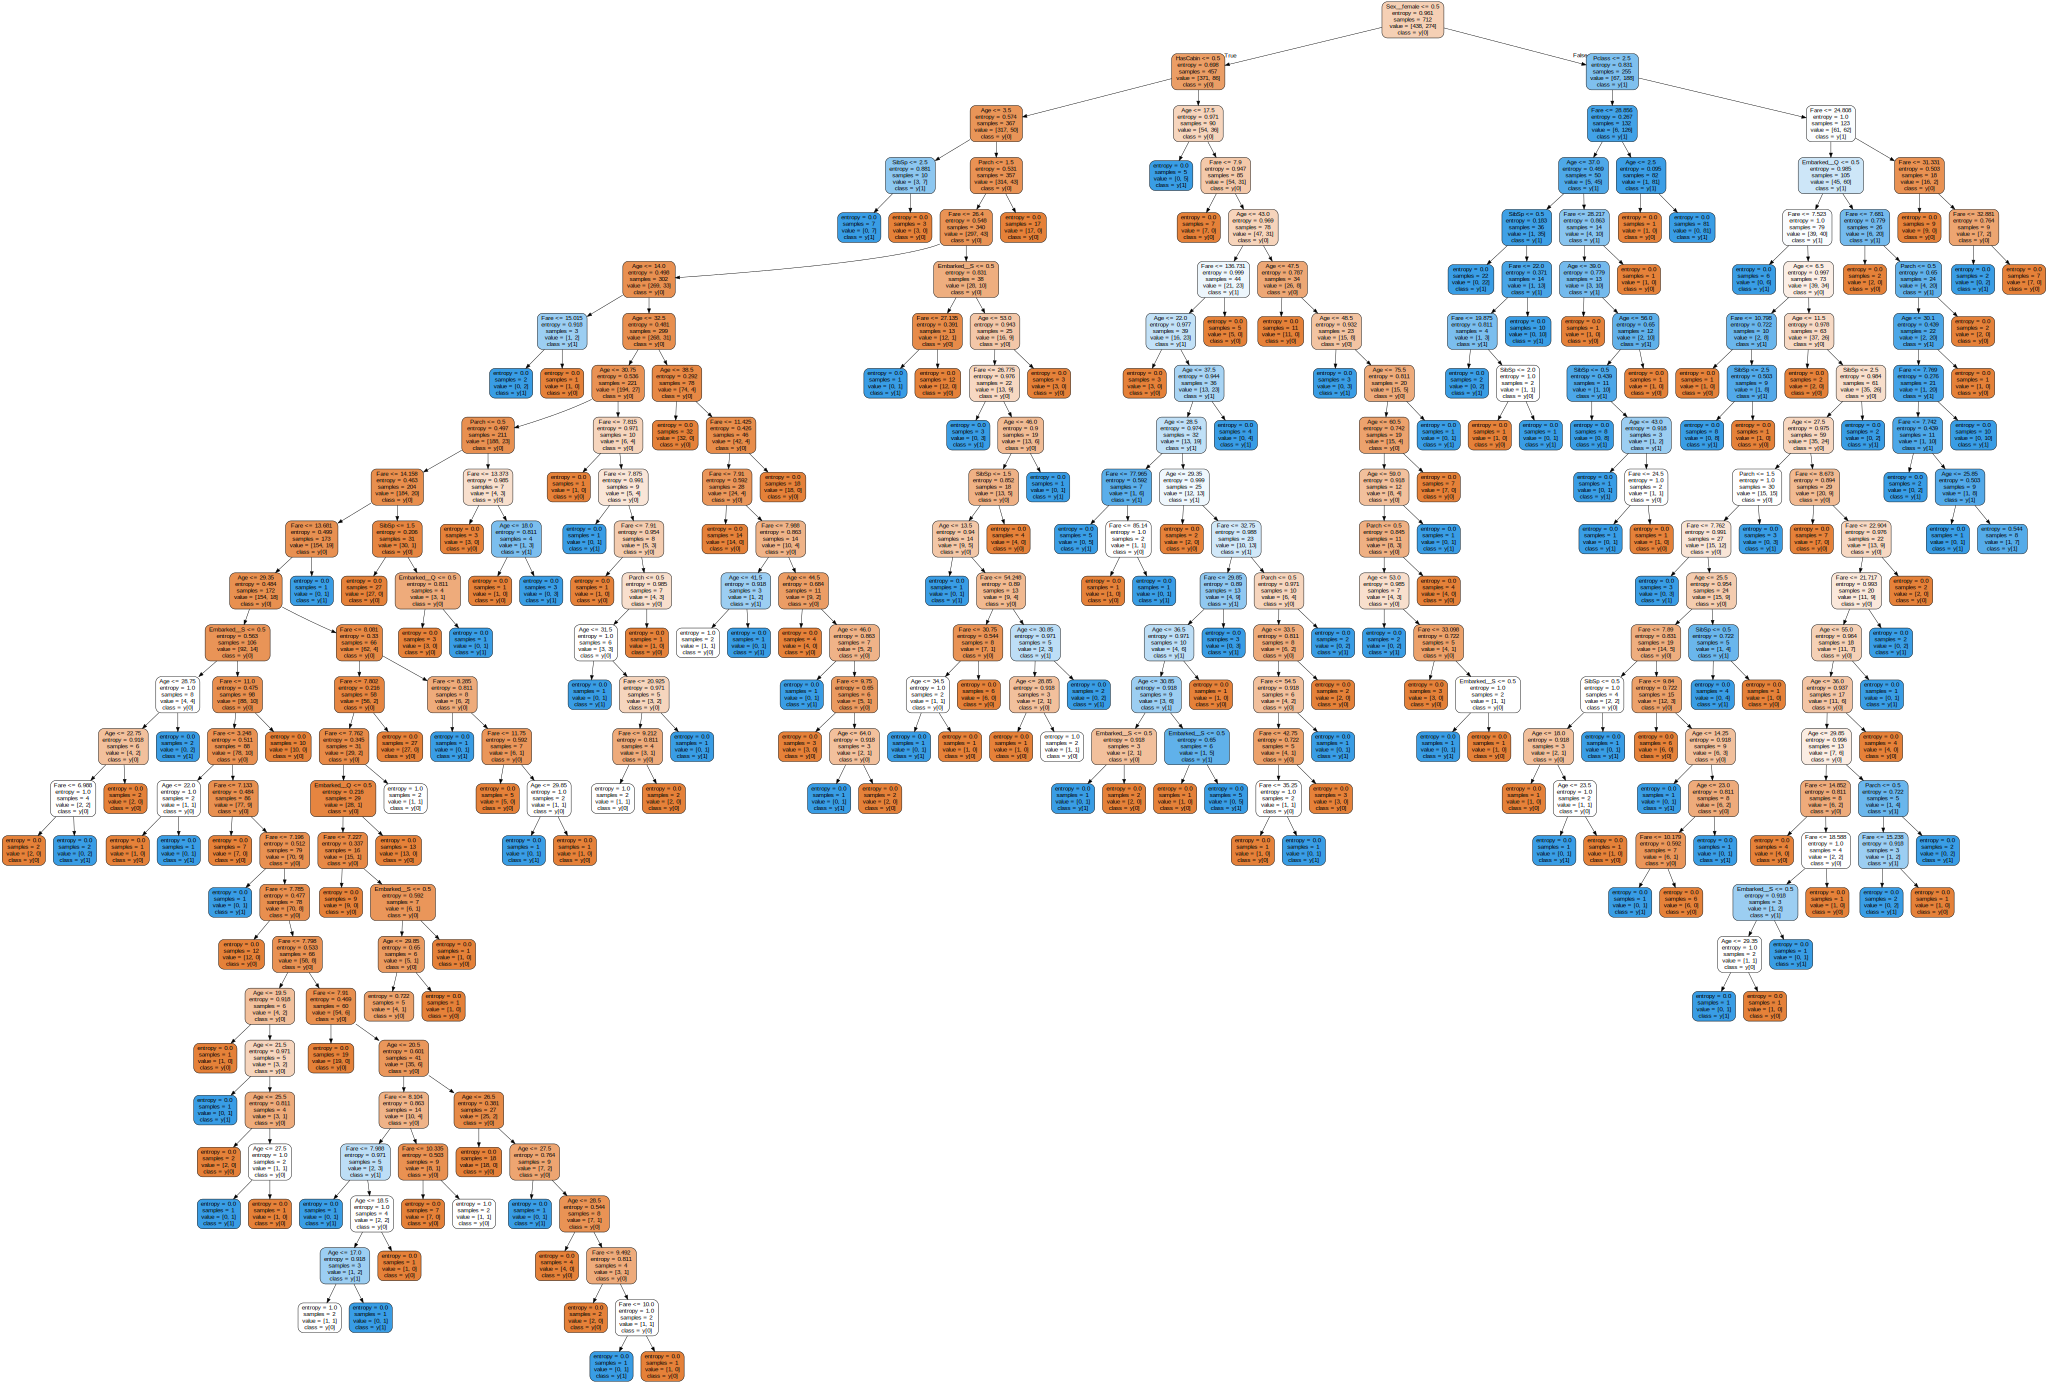

In [83]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names = x.columns.values, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph